<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Initial-imports" data-toc-modified-id="Initial-imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Initial imports</a></span></li><li><span><a href="#Parametrized-Curves" data-toc-modified-id="Parametrized-Curves-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Parametrized Curves</a></span></li><li><span><a href="#Parametrized-Surfaces" data-toc-modified-id="Parametrized-Surfaces-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Parametrized Surfaces</a></span></li><li><span><a href="#Vectorial-Fields" data-toc-modified-id="Vectorial-Fields-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Vectorial Fields</a></span></li><li><span><a href="#Differential-Operations" data-toc-modified-id="Differential-Operations-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Differential Operations</a></span></li><li><span><a href="#Line-Integral" data-toc-modified-id="Line-Integral-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Line Integral</a></span></li><li><span><a href="#Surface-integral" data-toc-modified-id="Surface-integral-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Surface integral</a></span></li></ul></div>

# Vector Calculus with Sympy

**For now, in all of the note, the Cartesian Coordinate System is assumed.**

## Initial imports

In [1]:
import numpy as np
from sympy import *
from sympy.vector import *
from sympy.plotting.plot import plot3d_parametric_line, plot3d_parametric_surface, plot_parametric
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
init_printing()

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "serif"
plt.rcParams['font.serif'] = "cm"
#plt.rcParams['text.latex.preamble'] = "\usepackage{subdepth}, \usepackage{type1cm}"

## Parametrized Curves

Before all we have to define some symbolic parameteres

In [4]:
x,y,z,t,u,v, phi, theta = symbols('x y z t u v phi theta',real=True)

To define a parametrized curve we must first estabilsh a coordinate sytem. To do this we have to import *CoordSys3D* class from *sympy.vector* and then initiate it 

In [5]:
R = CoordSys3D('R')

Now **R** is our Cartesian coordinate system with tree axis $\hat{i}, \hat{j}$ and $\hat{k}$. 

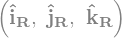

In [6]:
R.i, R.j,R.k

After having a coordinate system, we can define our parametrized curves. As these curves are vector functions, we can define them by the following approach $$\vec r(t) = x(t) \hat{i} + y(t) \hat{j} +z(t) \hat{k}.$$ For example, in 2-dimension space, a circle can be represented by $\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j}$ 

In [7]:
def circle(t): return cos(t)*R.i + sin(t)*R.j

In [8]:
circle(t)

In 3D, the helix $\vec r(t) = cos(t) \hat{i} + sin(t) \hat{j} + t \hat{k}$ we have

In [9]:
def helix(t): return cos(t)*R.i + sin(t)*R.j + t*R.k

In [10]:
helix(t)

We can access to the components of this vector by using *components* attribute. The result is a disctionary. 

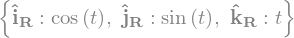

In [11]:
helix(t).components

For example the projection of the vector on x-coordinate is obtained by

In [12]:
helix(t).components[R.i]

Now lets plot this curve. Be sure that the module *plot3d_parametric_line* is imported. With the format that we have defined our curve, we can not feed directly the defined function to the plot module. Take a look at the help of *plot3d_parametric_line*. But don't become nervous! We can solve it. First we have to extract the components and then pass them to the plotting module. 

In [13]:
curve_components = tuple(helix(t).components.values())

Now we can pass the above tuple to the plot3d_parametric_line module. Note the tuple unpacking by `*´

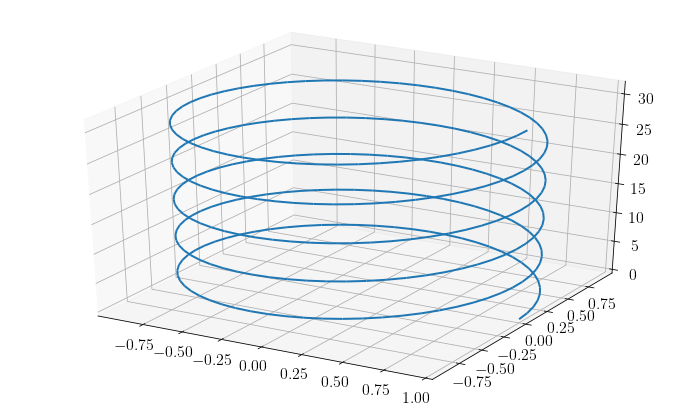

In [14]:
plot3d_parametric_line(*curve_components, (t,0,10*pi))
plt.show()

We can facilitate out task by a simple function that automatize the above procedure. The below function takes a parametrized curve, similar to our notation, and the name of the variable and the interval of plot

In [15]:
def Plot3d_Parametric_Curve(curve, a):
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    #components =[]
    curve_components = tuple(curve.components.values())
    
    plot3d_parametric_line(*curve_components, a)
    plt.show()
    
    
    pass 

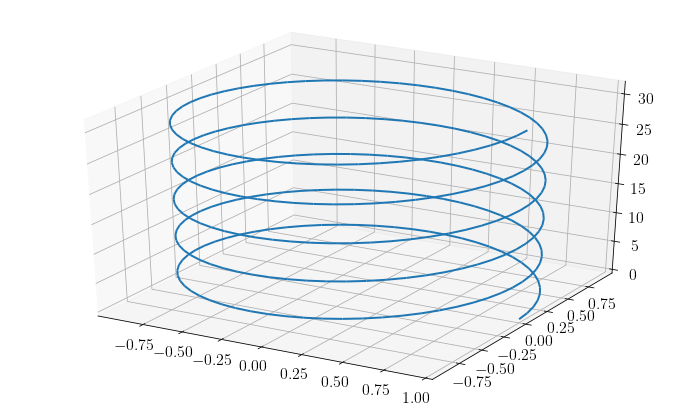

In [16]:
Plot3d_Parametric_Curve(helix(t),(t,0,10*pi))

But how we can plot a 2D parametrized curve? Very similar to the 3D case. Now we automatized for the 3D curves, we can do it directly for 2D curves with a subtle modification. Check if *plot_parametric* module is imported. 

In [17]:
def Plot_Parametric_Curve(curve, a):
    
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    curve_components = tuple(curve.components.values())
    
    
    plot = plot_parametric(*curve_components, a)
    #ax = plot._backend.ax
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax[0].set_aspect('equal')
    plt.show()
    
    pass 

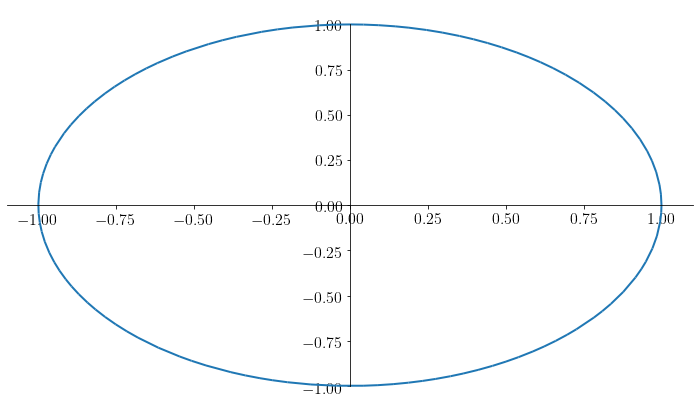

In [18]:
Plot_Parametric_Curve(circle(t),(t,0,2*pi))

Oops! It must be a circle but we see an elipse! It seems that the axes have different scale. Solving this problem isn't so simple and a blessed guy helped me to correct this aspect ratio in Sympy. This solution was provided in the [Putting together plots of Matplotlib and Sympy](https://stackoverflow.com/questions/60325325/putting-together-plots-of-matplotlib-and-sympy). In fact, in this solution we create an empty axes with equal axis in *matplotlib*, then we delete just the axes of the plot of *Sympy* and finally we transfer the figure of Sympy (without axes) to the new axes. The function for deleting and tranfering is 


In [19]:
def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    # Fix for > sympy v1.5
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)

With the above function we can modift our plotting function

In [20]:
def Plot_Parametric_Curve(curve, a):
    
    '''
    curve: must be in the notaion of sympy.vector
    a (tuple): (parameter, start, finish) 
    '''
    curve_components = tuple(curve.components.values())
    
    fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    
    plot = plot_parametric(*curve_components, a, show = False)
    
    move_sympyplot_to_axes(plot, ax)
    #ax = plot._backend.ax
    #fig = plt.figure()
    #ax = fig.add_subplot(111)
    #ax[0].set_aspect('equal')
    plt.show()
    
    pass 

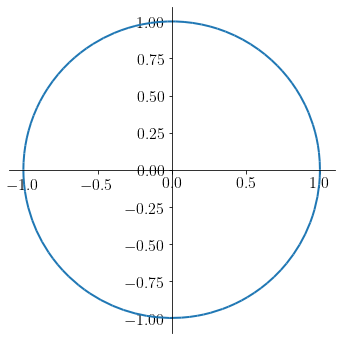

In [21]:
Plot_Parametric_Curve(circle(t),(t,0,2*pi))

As we now a curve is made of infinite points. By substituting a value for the parameter of the curve we can find the point associated to this parameter. For example

In [22]:
helix(pi)

In [23]:
circle(pi)

A parametrized curve, also can be imagined as a trajectory of a particle. This particle has a vector position that connect its position in the space to the origin of a coordinate system. If the parameter of the curve be time, then varying the parameter we get diferent position of the particle during its movement. 

The below function draw some position vectors of a 2D parametrized curve. In this function we used the *move_sympyplot_to_axes* introduced above to correct the ratio of axis.

In [24]:
def Plot_Position_Vector(curve, a, number=5):
    '''
    This function takes a 2D curve and draw some of its positional vectors.
    f: (Tuple) 2D parametric curve,
    a: (Tulpe with 3 elements)(parameter, start, stop)
    number: (integer) number of the position vectors in the above interval. 
    '''
    
    from sympy.plotting.plot import plot_parametric
    curve_components = tuple(curve.components.values())
    plot_curve = plot_parametric(*curve_components, a, show=False)
    
    fig, ax = plt.subplots(ncols=1)
    ax.set_aspect('equal')
    
    #here we check to ensure that the free parameter of curve is the same as a[0]
       
    parameters = set()
    for component in curve_components:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
    assert a[0]==list(parameters)[0], "Error: The parameter of curve must be the same as first element of second argument"
    
    
    
    dx = [curve_components[0].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]
    dy = [curve_components[1].subs(a[0], i) for i in np.linspace(float(a[1]),float(a[2]), number)]

    for i in range(len(dx)):
        ax.arrow(0,0,float(dx[i]),float(dy[i]),head_width = 0.05, head_length=0.05,length_includes_head=True)
        #ax.add_artist(a)
    
    
   
    
    move_sympyplot_to_axes(plot_curve, ax)
    
    
    plt.show()
    
    

As an Example

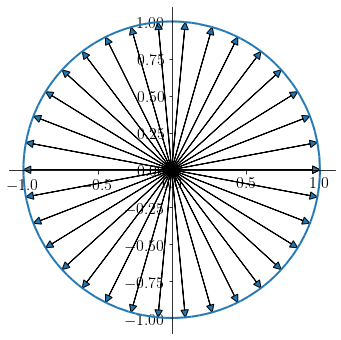

In [25]:
Plot_Position_Vector(circle(t),(t,0,2*pi), 35)

For the position vectors of 3D parametrized curve, beside the function *move_sympyplot_to_axes* we will need to define a new class for 3D arrows, as it is not available in *matplotlib*  yet. This class is a modified version of 2D Arrow class. It was adopted from [Putting arrowheads on vectors in matplotlib's 3d plot](https://stackoverflow.com/questions/22867620/putting-arrowheads-on-vectors-in-matplotlibs-3d-plot)

In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
        FancyArrowPatch.draw(self, renderer)

Using the above class for the parametrized curves in 3D we have

In [27]:
def Plot3d_Position_Vector(g, a, *arg):
    '''
    This function takes a 3D curve and draw some of its positional vectors.
    geometry: 3D parametric curve or surface.
    
    a: (Tulpe with 3 elements)(parameter, start, stop)
    
    arg: (Tulpe with 3 elements) in the case of surface this argument is necessary(second parameter, start, stop) 
    '''
    from sympy.plotting.plot import plot3d_parametric_line , plot3d_parametric_surface
    from mpl_toolkits.mplot3d import Axes3D
    
    geometry_components = tuple(g.components.values())
    
    
    #here we check to ensure that the free parameter of curve is the same as a[0]
    parameters = set()
    for component in geometry_components:
        # in the below the 'if statement' check if the component of curve is a sympy object. 
        if isinstance(component,tuple(core.all_classes)):
            parameters.update(component.free_symbols)
            
    
    #Deciding if the geometry is a curve or surface        
    if len(parameters)== 1:
        assert a[0]==list(parameters)[0], "Error: The parameter of curve must be the same as first element of second argument"
        plot_geometry = plot3d_parametric_line(*geometry_components, a, show = False)
    
    if len(parameters)== 2:
        b = arg[0] #in the case of surface is a second parameter and its domain
        plot_geometry = plot3d_parametric_surface(*geometry_components, a, arg[0], show = False)
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    
    if len(parameters) == 2:
        number1 = np.random.randint(a[1], a[2], 20)
        number2 = np.random.randint(b[1], b[2], 20)
        dx = [geometry_components[0].subs(a[0], i).subs(b[0],j) for i in number1 for j in number2]
        dy = [geometry_components[1].subs(a[0], i).subs(b[0],j) for i in number1 for j in number2]
        dz = [geometry_components[2].subs(a[0], i).subs(b[0],j) for i in number1 for j in number2]
    
    if len(parameters) == 1:
        numbers = np.random.randint(a[1], a[2], 20)
        dx = [geometry_components[0].subs(a[0], i) for i in numbers]
        dy = [geometry_components[1].subs(a[0], i) for i in numbers]
        dz = [geometry_components[2].subs(a[0], i) for i in numbers]
    
       
    for i in range(len(dx)):
        a = Arrow3D([0,float(dx[i])],[0,float(dy[i])],[0,float(dz[i])], 
                    mutation_scale=20, lw=2, arrowstyle="-|>", color="black")
        ax.add_artist(a)
        
    move_sympyplot_to_axes(plot_geometry, ax)
    plt.draw()
    plt.show()
    #return len(parameters)

As an example

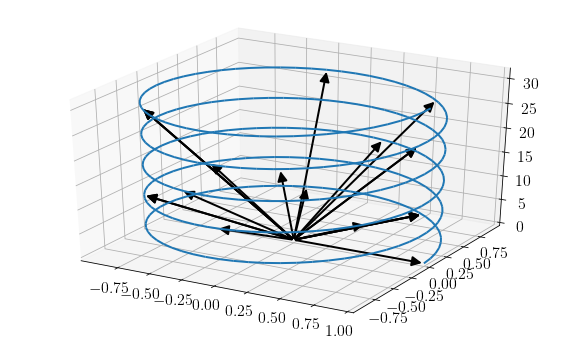

In [28]:
Plot3d_Position_Vector(helix(t),(t,0,10*pi))

Here we have a question, how is the scalar(dot) product between two vectores? 

In [29]:
x1 = Function('x1');x2 = Function('x2');y1 = Function('y1');
y2 = Function('y2');z1 = Function('z1');z2 = Function('z2')

def curve1(t): return x1(t)*R.i + y1(t)*R.j + z1(t)*R.k 
def curve2(t): return x2(t)*R.i + y2(t)*R.j + z2(t)*R.k 

In [30]:
curve1(t).dot(curve2(t))

In [31]:
R.j.dot(R.j)

In [32]:
R.i.dot(R.j)

A function that do the cross product of two vectors 

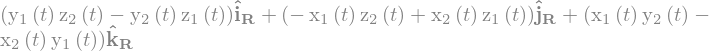

In [33]:
curve1(t).cross(curve2(t))

Just for test

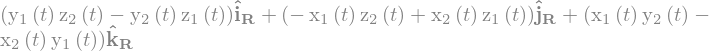

In [34]:
curve1(t) ^ curve2(t)

Finding the norm (module, magnitude) of a vector

In [35]:
def Norm(v):
    return simplify(sqrt(v.dot(v)))

Checking the above function

In [36]:
Norm(curve1(t))

In fact, there is an internal function in Sympy that calculate the norm of a vector

In [37]:
curve1(t).magnitude()

For transfrming a vector to a unit vector 

In [38]:
def Unit_Vector(curve):
    return curve/Norm(curve)

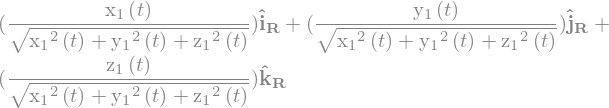

In [39]:
Unit_Vector(curve1(t))

Using the internal function of *normalize*

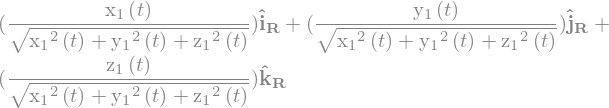

In [40]:
curve1(t).normalize()

For the derivative of a vectorial function

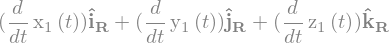

In [41]:
curve1(t).diff(t)

In [42]:
helix(t).diff(t)

If the vectorial function has only one variable (just curves), there is no need to insert it explicitly in *diff()*

In [43]:
helix(t).diff()

Finding the Length of a curve between two points, $t \epsilon [a,b]$

In [44]:
def Arc_Length(curve, a:Tuple): 
    return integrate(Norm(curve.diff()),a)

In [45]:
Arc_Length(helix(t),(t,0,pi))

**Exercise:** Use the internal function *magnitude()* to calculate the length of a curve

Finding the numeric value of the above expression

In [46]:
N(Arc_Length(helix(t),(t,0,pi)))

Finding the circumference of circle with radius 3

In [47]:
Arc_Length(3*circle(t),(t,0,2*pi))

## Parametrized Surfaces

First of all we have to define a function that create a parametrized surface. As we know a parametrized surface has two parameteres. 

In [48]:
def surface1(u,v): return v*cos(u)*R.i + v*sin(u)*R.j + v*R.k

In [49]:
surface1(u,v)

Now we have learnt how to plot a curve, we can plot a surface easily but using the module 'plot3d_parametric_surface'. We again go throught the procedure first and then construct a function for it

In [50]:
surface_components = tuple(surface1(u,v).components.values())

In [51]:
surface_components

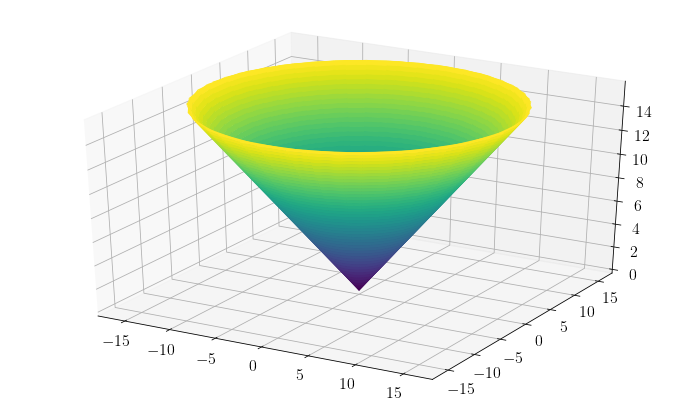

In [52]:
plot3d_parametric_surface(*surface_components, (u,0,5*pi),(v,0,5*pi))
plt.show()

another surface

In [53]:
def surface2(u,v): return v*cos(u)*R.i + v*sin(u)*R.j + u*R.k

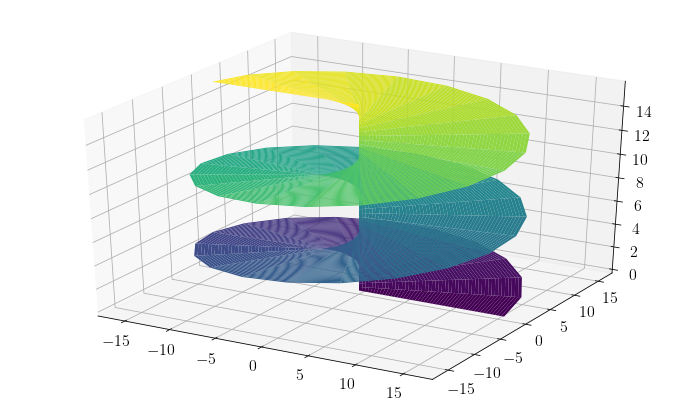

In [54]:
plot3d_parametric_surface(*tuple(surface2(u,v).components.values()), (u,0,5*pi),(v,0,5*pi))
plt.show()

Let's plot a unit sphere. First we have to define it in a parametrized way 

In [55]:
def sphere(phi, theta): return sin(phi)*cos(theta)*R.i + sin(phi)*sin(theta)*R.j + cos(phi)*R.k

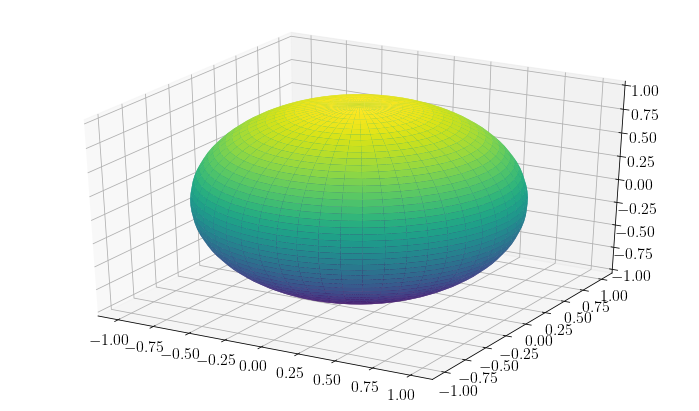

In [56]:
plot3d_parametric_surface(*tuple(sphere(phi,theta).components.values()), (phi,0,pi),(theta,0,2*pi))
plt.show()

If the above plot has some problem and is not a perfect sphere, we need to modify some internal functionality of *matplotlib* to solve this issue. A blessed guy helped me find a solution for it [Plot a perfect sphere with equal axes by parametric plot in Sympy](https://stackoverflow.com/questions/60332066/plot-a-perfect-sphere-with-equal-axes-by-parametric-plot-in-sympy)

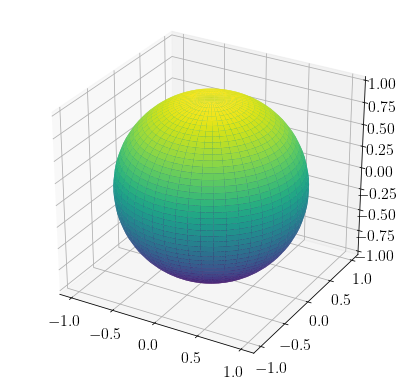

In [57]:
plt.rcParams['figure.figsize'] = 6, 5.6
plot3d_parametric_surface(*tuple(sphere(phi,theta).components.values()), (phi,0,pi),(theta,0,2*pi))
plt.show()

We can calculate the derivative of a parametrized surface with respect to its parameters

In [58]:
surface1(u,v).diff(v)

In [59]:
surface1(u,v).diff(u)

It would be nice to have a function that gives us the area of a parametrized surface

In [60]:
def Surface_Area(surface, a,b):
    '''
        This function calculate the area of a 3D parametrized surface
        surface:(Tuple) parametrized surface
        a:(Tuple) (first parameter of the surface, initial point, final point)
        b:(Tuple) (second parameter of the surface, initial point, final point)
    '''
        
    module = Norm(surface.diff(a[0])^surface.diff(b[0]))
    return integrate(module, a ,b)

For example the area of a sphere with radius 2 is 

In [61]:
Surface_Area(2*sphere(phi,theta), (theta,0,2*pi), (phi,0,pi))

As the parametrized curves, we can imagine the parametrized surfaces are infinite points drawn by a vector originated from center of the coordinate system. By varying two parameters of a surface equation we can access to its different points.  

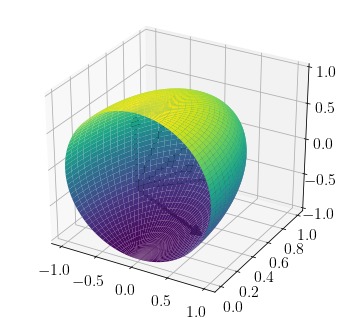

In [62]:
Plot3d_Position_Vector(sphere(theta,phi), (phi, 0, pi), (theta,0, pi))

## Vectorial Fields

In [63]:
def field1(x,y,z): return x**2*R.i + y**2*R.j + z**2*R.k

In [64]:
field1(x,y,z)

The associated vector to a point in the space can be yielded by

In [65]:
field1(2,2,2)

In [66]:
def field2(x,y): return x**2*R.i + y**2*R.j

In [67]:
field2(x,y)

Plotting a 2D vector field

In [68]:
def Plot_Vector_Field(field, a, b):
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline
    
    f = tuple(field.components.values())
    
    assert len(a)==len(b)==3 , "A 2D vector field need two inputs (as Tuple), each one with three elements "
    assert len(f)==2, "This function just handle 2D vector fields"
    
    xrange = np.linspace(a[1],a[2],15)
    yrange = np.linspace(b[1],b[2],15)
    X,Y = np.meshgrid(xrange, yrange)

    U= np.zeros((15,15))
    V= np.zeros((15,15))

    for i in range(len(xrange)):
        for j in range(len(yrange)):
            x1 = X[i,j]
            y1 = Y[i,j]
            U[i,j] = f[0].subs({a[0]:x1, b[0]:y1})
            V[i,j] = f[1].subs({a[0]:x1, b[0]:y1})

    plt.quiver(X,Y,U,V)
    plt.title(f"vector field {f}")
    plt.show()

Checking the above function

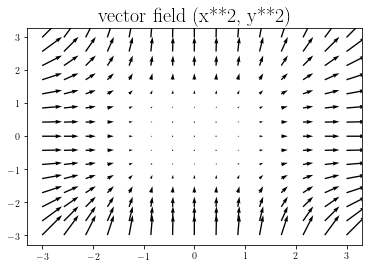

In [69]:
Plot_Vector_Field(field2(x,y),(x,-3,3),(y,-3,3))

Plotting a 3D vector field **this function needs some adjusments**

In [70]:
def Plot3d_Vector_Field(field, a, b, c, mesh_size=10, length=None):
    
    f = tuple(field.components.values())
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    from mpl_toolkits.mplot3d import axes3d
    import matplotlib.pyplot as plt
    import numpy as np
    %matplotlib inline    
    
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')

# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    ax.quiver(x, y, z, u, v, w, length=length, normalize=True)

    plt.show()

Checking the above function

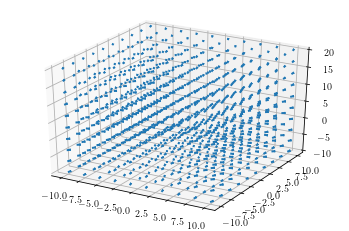

In [71]:
Plot3d_Vector_Field(field1(x,y,z), (x,-10,10),(y,-10,10),(z,-10,20),length=0.5)

A better plooting function for 3D vector fields. This function needs Mayavi package

In [72]:
def Plot3d_Vector_Field_mayavi(field, a, b, c, mask_points=5, scale_factor=3, mesh_size=10):
    
    f = tuple(field.components.values())
    assert len(a)==len(b)==len(c)==3, "A 3D vector field needs three argments"
    assert len(f)==3, "This function just handle the 3D vector fields"
    
    %gui qt
    import numpy as np
    from mayavi import mlab   
    mlab.init_notebook()
    mlab.clf()
    
# Make the grid
    xrange = np.linspace(a[1],a[2],mesh_size)
    yrange = np.linspace(b[1],b[2],mesh_size)
    zrange = np.linspace(c[1],c[2],mesh_size)
    x, y, z = np.meshgrid(xrange, yrange, zrange)
    

# Make the direction data for the arrows
    u = np.zeros((mesh_size,mesh_size,mesh_size))
    v = np.zeros((mesh_size,mesh_size,mesh_size))
    w = np.zeros((mesh_size,mesh_size,mesh_size))
    
    for i in range(len(xrange)):
        for j in range(len(yrange)):
            for k in range(len(zrange)):
                x1 = x[i,j,k]
                y1 = y[i,j,k]
                z1 = z[i,j,k]
                u[i,j,k] = f[0].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                v[i,j,k] = f[1].subs({a[0]:x1, b[0]:y1, c[0]:z1})
                w[i,j,k] = f[2].subs({a[0]:x1, b[0]:y1, c[0]:z1})

    src = mlab.pipeline.vector_field(u, v, w)
    return mlab.pipeline.vectors(src, mask_points=mask_points, scale_factor=scale_factor)

Checking the above function. 

In [73]:
Plot3d_Vector_Field_mayavi(field1(x,y,z), (x,-10,10),(y,-10,10),(z,-10,20))

Notebook initialized with ipy backend.


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01\x90\x00\x00\x01^\x08\x02\x00\x00\x00$?\xde_\x00\…

## Differential Operations

**Attention! these functions work only for Cartesian Coordinate System**

Gradient of an scalar function. The result is a vector field

In [74]:
def Gradient(f,*args):
    assert len(args)>0 , "Insert the variables"
    grad=[]
    for var in args:
        grad.append(diff(f,var))
    if len(grad)==3:
        return grad[0]*R.i + grad[1]*R.j + grad[2]*R.k
    if len(grad)==2:
        return grad[0]*R.i + grad[1]*R.j

In [75]:
Gradient(x*y*sin(z**2),x,y,z)

In [76]:
Gradient(x*y*sin(x**2),x,y)

Curl of a 3D vector field. The result continue as a vector field

In [77]:
def Curl(field, *args):
    f = tuple(field.components.values())
    assert len(args)==len(f)==3, "This function works just in 3D space"
    return (diff(f[2],args[1])-diff(f[1],args[2]))*R.i + (diff(f[1],args[2])-diff(f[2],args[0]))*R.j \
                + (diff(f[1],args[0])-diff(f[1],args[0]))*R.k

Checking the above function

In [78]:
Curl(field1(x,y,z),x,y,z)

Divergent of a vector field. The result is an scalar function

In [79]:
def Divergent(field, *args):
    f = tuple(field.components.values())
    assert len(f)==len(args), "The number of components of the vector field must be equal to the number of given variables"
    result=0
    for index,component in enumerate(f):
        result+=diff(component,args[index])
    return result


Checking the above function

In [80]:
Divergent(field1(x,y,z),x,y,z)

## Line Integral

Line integrais are frequently encountered in science and engineering $$\int_a^b \vec{F}. d\vec{r}$$

In [81]:
def Line_Integral(field,curve,a):
    '''
    field: Vector field F(x,y,z) = P(x,y,z)i + R(x,y,z)j + Q(x,y,z)k
    curve: parametrized curve r(t) = x(t)i + y(t)j + z(t)k
    a:(Tuple) (parameter of the curve, initial point, final point)
    Note: if the field is tridimensional, the curve also must have the same dimension. 
    
    '''
    f = tuple(field.components.values())
    c = tuple(curve.components.values())
    assert len(c)==len(f), "Error: Dimensionaluity of the field and the curve must be equal."
    

    coordinate = [x,y,z]
    parametrized_field=[]
    #first we have to parametrize the field using the parametric euqations of curve.
    for index, component in enumerate(f):
        parametrized_field.append(component.subs(coordinate[index],c[index]))
        
    if len(f)==2:
        new_field = parametrized_field[0]*R.i + parametrized_field[1]*R.j 
    if len(f) == 3:    
        new_field = parametrized_field[0]*R.i + parametrized_field[1]*R.j + parametrized_field[2]*R.k 
        
    # new_filed is the parametrized field
    
    integrand = new_field.dot(diff(curve))
    
        
    return integrate(integrand,a)


For example

In [82]:
field1(x,y,z)

In [83]:
helix(t)

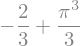

In [84]:
Line_Integral(field1(x,y,z),helix(t), (t,0,pi))

An example in 2D

In [85]:
field2(x,y)

In [86]:
circle(t)

In [87]:
Line_Integral(field2(x,y),circle(t), (t,0,pi))

## Surface integral

The flux of a vectorial field through a surface is calculated using surface integral

In [88]:
def Surface_Integral(field,surface, a = 0, b = 0):
    '''
    field:(Tuple) Vector field
    surface:(Tuple) parametrized surface
    a:(Tuple) (first parameter of the surface, initial point, final point)
    b:(Tuple) (second parameter of the surface, initial point, final point)
    Note: if the vector field is tridimensional, the surface also must have the same dimensions. 
    
    '''
    
    f = tuple(field.components.values())
    s = tuple(surface.components.values())
    assert len(f)==len(s), "Error: Dimensionaluity of the field and the curve must be equal."
    
    module = diff(surface,a[0])^diff(surface,b[0])
    #module = Cross(Diff(surface,a[0]),Diff(surface,b[0]))
    
    coordinate = [x,y,z]
    parametrized_field=[]
    #first we have to parmetrize the field using the parametric euqations of curve.
    for index, component in enumerate(f):
        parametrized_field.append(component.subs(coordinate[index],s[index]))
        
    if len(f)==2:
        new_field = parametrized_field[0]*R.i + parametrized_field[1]*R.j 
    if len(f) == 3:    
        new_field = parametrized_field[0]*R.i + parametrized_field[1]*R.j + parametrized_field[2]*R.k 
    
    '''coordinate = [x,y,z]
    parametrized_field=[]
    for index, component in enumerate(field):
        parametrized_field.append(Substitute(component,(coordinate[index], surface[index])))
    '''
    
    return integrate(new_field.dot(module),a,b)

For example we get

In [89]:
surface1(u,v)

The flux of the field $\vec{F}(x,y,z) = x^2 \hat{i} + y^2 \hat{j} + z^2 \hat{k}$ through the 
$$\vec{S}(u,v) = \displaystyle (v \cos{\left(u \right)})\mathbf{\hat{i}_{R}} + (v \sin{\left(u \right)})\mathbf{\hat{j}_{R}} + (v)\mathbf{\hat{k}_{R}}$$
in the range $u \in [0,\pi]$ and $v \in [0,3]$ is

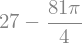

In [90]:
Surface_Integral(field1(x,y,z),surface1(u,v), (u,0,pi), (v,0,3))

The flux of the field $\vec{F}(x,y,z) = x^2 \hat{i} + y^2 \hat{j} + z^2 \hat{k}$ through of a sphere with radious 1 is 

In [91]:
Surface_Integral(field1(x,y,z),sphere(phi,theta), (theta,0,2*pi), (phi,0,pi))